In [ ]:
# 设定模型缓存目录
import os
os.environ["MODELSCOPE_CACHE"] = "./modelscope_cache"

In [ ]:
# 下载模型到缓存目录
from modelscope import snapshot_download
model_dir = snapshot_download("Tongyi-MAI/Z-Image-Turbo")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

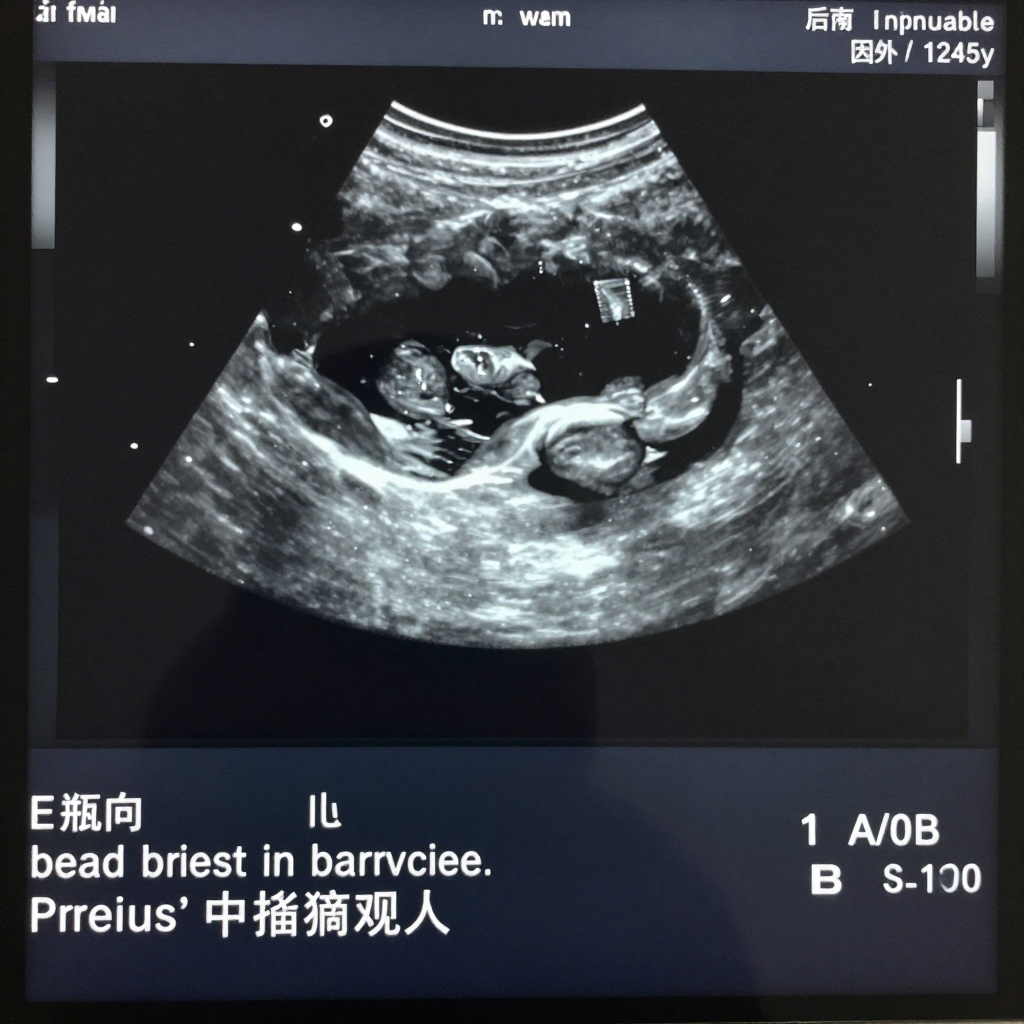

In [8]:
import torch
from diffusers import ZImagePipeline

# Load the pipeline
pipe = ZImagePipeline.from_pretrained(
    model_dir,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=False,
)
pipe.to("cuda")

# Enable optimizations (optional)
# pipe.transformer.compile()
pipe.enable_model_cpu_offload()

# NSFW prompt example
prompt = "breast ultrasound, normal"

# Generate image
pipe(
    prompt=prompt,
    height=1024,
    width=1024,
    num_inference_steps=9,  # Optimal for Turbo
    guidance_scale=0.0,     # No guidance for uncensored output
    generator=torch.Generator("cuda").manual_seed(69),
).images[0]

# image.save("nsfw_example.png")